# Phenotype Grapher

In [ ]:
# デフォルトで以下は読み込まれているのでナシでもOK
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

In [8]:
df = pd.read_csv("./sample_data.csv", index_col=0).T
# なお，データはHozumi et al.とNakamura et al.から取ってきているので悪しからず

# n数をリストにしておく
df_total = list(df.sum())

df.T # データにおかしなところが無いか最終チェック

,Normal,Non-lateral,Inverse,N/A
Wild-type,246,0,1,0
Myo31DF[souther],9,0,28,0
Myo31DF[L152],23,0,105,0
pbl[2],30,8,24,0


In [9]:
# 割合に変換
df2 = df.div(df.sum()).T
df2 = df2 * 100
df2

,Normal,Non-lateral,Inverse,N/A
Wild-type,99.595142,0.000000,0.404858,0.0
Myo31DF[souther],24.324324,0.000000,75.675676,0.0
Myo31DF[L152],17.968750,0.000000,82.031250,0.0
pbl[2],48.387097,12.903226,38.709677,0.0


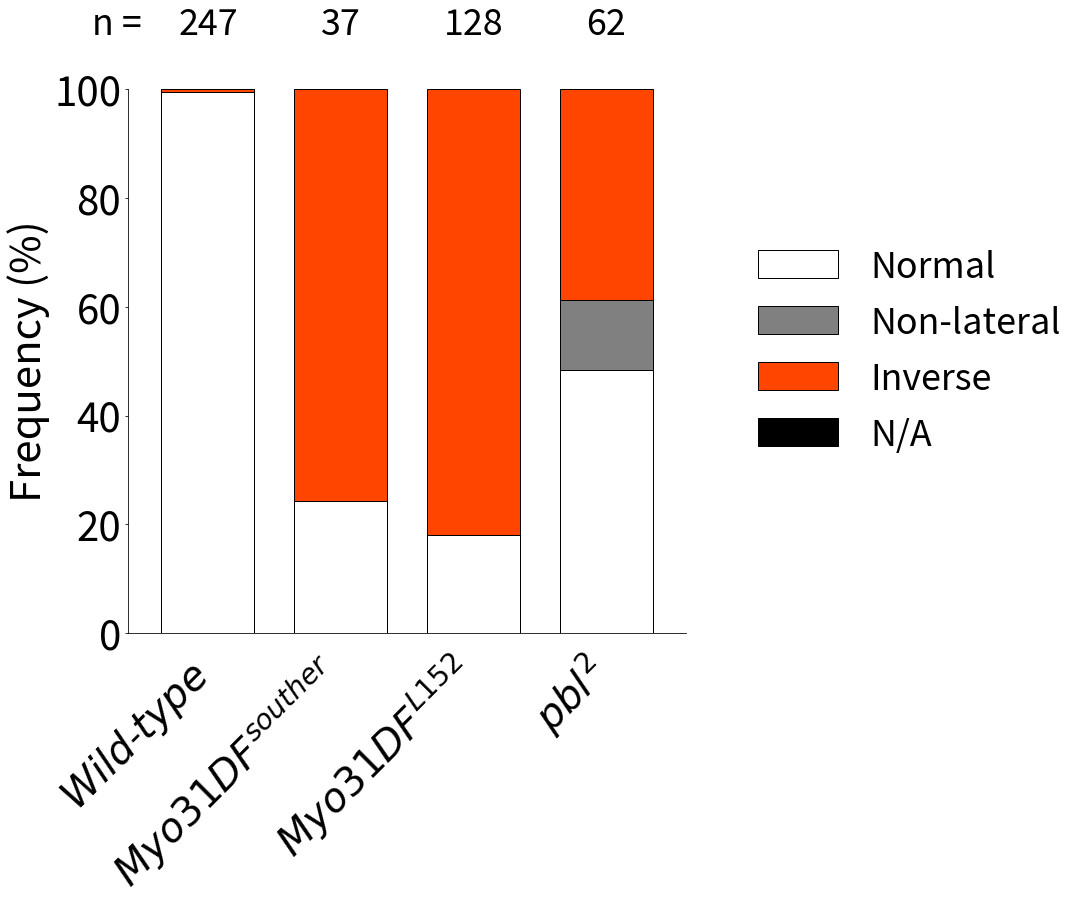

In [10]:
# 図を作る前に，サイズの調整

graph_width = 10
graph_height = 10

figsize = (graph_width, graph_height)

xlabel_fontsize = 45
ylabel_fontsize = 14
legend_fontsize = 40
total_num_fontsize = 40

legend_loc_morethan7 = (0.03,1.2)
legend_loc_lessthan6 = (1.1, 0.3)

# フォントの整備
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Source Sans Pro'

# 使えるフォントの確認は以下から
# import matplotlib.font_manager
# print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# 積み上げ棒グラフの作成
ax = df2.plot(kind="bar", stacked=True, width=0.7, figsize=figsize, ylim=(0,100), fontsize=xlabel_fontsize, color=['white', 'grey', 'orangered', 'black'], edgecolor='black')
ax.set_ylabel("Frequency (%)", fontsize=10/3*ylabel_fontsize)

# グラフの囲み線の内，上と右の部分を削除
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# 横軸ラベルを傾け，haでずれを寄せる
# 上付き文字付きにするためにコメントアウト
# ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")

# 上付き文字で遺伝型をラベル
plt.xticks([])
x_loc_xticklabels = graph_width / 130.0
y_loc_xticklabels = -10 # これはたぶん任意に変更すべき
for x, genotype_name in zip(range(len(df_total)),df2.index):
    genotype_name = genotype_name.replace("[", "^{")
    genotype_name = genotype_name.replace("]", "}")
    genotype_name = genotype_name.replace("-", "$-$")
    genotype_name = "$" + genotype_name + "$"
    plt.text(x=x+x_loc_xticklabels, y=y_loc_xticklabels, s=genotype_name, ha="right", rotation=45, fontsize=legend_fontsize)

# 目盛りが鬱陶しいので白色にしておく
plt.gca().xaxis.set_tick_params(length=20, tick1On=False)

# fig legendを設定
if len(df_total) > 6:
    plt.legend(loc=legend_loc_morethan7, fontsize=legend_fontsize, ncol=4, frameon=False)
else:
    plt.legend(loc=legend_loc_lessthan6, fontsize=legend_fontsize, ncol=1, frameon=False)

# n数を置く
offset = {"x": 0, "y": 110}
plt.text(x=-0.5, y=offset["y"], s="n =", fontsize=total_num_fontsize, ha='right')
for total_num, x in zip(df_total, range(len(df_total))):
    if pd.isnull(total_num):
        plt.text(x = x - offset["x"], y = offset["y"], s = "0", fontsize = total_num_fontsize, ha = "center")
    else:
        plt.text(x = x - offset["x"], y = offset["y"], s = str(int(total_num)), fontsize = total_num_fontsize, ha = "center")

# プロット
plt.show()